<a href="https://colab.research.google.com/github/chiarasanguineti/Orbital-satellites-analysis/blob/main/satellites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisi dei satelliti orbitali**

### Introduzione  e obiettivi

**Obiettivo principale**
L'obiettivo di questo progetto era analizzare i satelliti orbitali per comprendere le tendenze principali, tra cui il numero di satelliti lanciati ogni anno e la loro distribuzione per tipo di orbita. Ho utilizzato un dataset pubblico contenente informazioni su satelliti non classificati.

Dopo aver definito l'obiettivo, ho seguito i seguenti passaggi principali:

1. *Esplorazione e Pulizia dei Dati*

Ho esaminato il dataset per verificare la presenza di valori nulli, duplicati o anomalie. Successivamente, ho eliminato colonne non necessarie e ho creato nuove colonne utili per l'analisi, come l'anno di lancio dei satelliti.

2. *Analisi Esplorativa dei Dati (EDA)*

Ho eseguito un'analisi esplorativa per individuare le principali tendenze nei dati. Questo ha incluso:

  - Il numero di satelliti lanciati ogni anno.
  - La distribuzione dei satelliti per tipo di orbita (LEO, MEO, GEO, Altro).
  - La classificazione dei satelliti come "classificati" o "non classificati".
3. *Visualizzazioni*

Ho creato diversi grafici per rappresentare visivamente i risultati, tra cui:

  - Grafico del numero di satelliti lanciati annualmente.
  - Grafico della distribuzione dei satelliti per tipo di orbita.

## Setup ambiente

In [137]:
!pip install numpy pandas matplotlib plotly sgp4 requests

In [ ]:
# importazione librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sgp4.api import Satrec
import requests
from prophet import Prophet



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-04ba73a7da4b>", line 8, in <cell line: 0>
    from prophet import Prophet
  File "/usr/local/lib/python3.11/dist-packages/prophet/__init__.py", line 7, in <module>
    from prophet.forecaster import Prophet
  File "/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py", line 22, in <module>
    from prophet.plot import (plot, plot_components)
  File "/usr/local/lib/python3.11/dist-packages/prophet/plot.py", line 14, in <module>
    from prophet.diagnostics import performance_metrics
  File "/usr/local/lib/python3.11/dist-packages/prophet/diagnostics.py", line 10, in <module>
    from tqdm.auto import tqdm
  File "/usr/local/lib/python3.11/dist-packages/tqdm/auto.py", line 21, in <module>
    from .autonotebook import tqdm as notebook_tqdm
  File "/usr/local/lib/

## Raccolta Dati

### Raccolta dati


I dati utilizzati per questo progetto provengono dal sito CelesTrak, una fonte autorevole per informazioni sui satelliti orbitali.

CelesTrak fornisce dati aggiornati relativi a oggetti in orbita, tra cui satelliti attivi, rottami spaziali e altre entità in orbita intorno alla Terra. I dati sono basati sugli elementi orbitali calcolati e aggiornati regolarmente tramite il modello General Perturbation (GP), che tiene conto di perturbazioni gravitazionali e atmosferiche.

In particolare, ho utilizzato il file CSV degli "Active Satellites", accessibile all'indirizzo:  https://celestrak.org/NORAD/elements/table.php?GROUP=active&SHOW-OPS&OLDEST&FORMAT=csv
(CelesTrak Active Satellites)

Il dataset include elementi orbitali calcolati o aggiornati più di 3,5 giorni fa. Pertanto, non si tratta di dati in tempo reale, ma di dati recenti e affidabili, sufficientemente accurati per analisi esplorative.

Scarichiamo i dati CSV dal file degli "Active Satellites".


In [138]:
# url del csv
url = "https://celestrak.org/NORAD/elements/gp.php?GROUP=active&FORMAT=csv"

# leggo il csv direttamente dall'url
satellites_df = pd.read_csv(url)

# visualizzazone delle prime righe del dataset
print(satellites_df.head())

# informazioni generali sul dataset
print(satellites_df.info())

    OBJECT_NAME  OBJECT_ID                       EPOCH  MEAN_MOTION  \
0   CALSPHERE 1  1964-063C  2025-02-02T02:18:47.383200    13.757874   
1   CALSPHERE 2  1964-063E  2025-02-01T13:27:56.255328    13.528457   
2         LCS 1  1965-034C  2025-02-01T17:24:24.557472     9.893078   
3     TEMPSAT 1  1965-065E  2025-02-01T12:50:46.729248    13.335529   
4  CALSPHERE 4A  1965-065H  2025-02-01T17:41:41.716896    13.361622   

   ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  ARG_OF_PERICENTER  MEAN_ANOMALY  \
0      0.002545      90.2075         60.3716            11.0315       49.8048   
1      0.001680      90.2215         64.1262           237.4073      292.3615   
2      0.001057      32.1418        285.3085           148.9736      211.1387   
3      0.006868      89.9651        213.2561           213.3181      209.1635   
4      0.007095      89.9341        126.6935            76.7358       90.1912   

   EPHEMERIS_TYPE CLASSIFICATION_TYPE  NORAD_CAT_ID  ELEMENT_SET_NO  \
0              

## Esplorazione e pulizia dei dati


In [139]:
satellites_df

,OBJECT_NAME,OBJECT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT
0,CALSPHERE 1,1964-063C,2025-02-02T02:18:47.383200,13.757874,0.002545,90.2075,60.3716,11.0315,49.8048,0,U,900,999,263,0.001211,1.182000e-05,0.000000e+00
1,CALSPHERE 2,1964-063E,2025-02-01T13:27:56.255328,13.528457,0.001680,90.2215,64.1262,237.4073,292.3615,0,U,902,999,78857,0.000114,8.500000e-07,0.000000e+00
2,LCS 1,1965-034C,2025-02-01T17:24:24.557472,9.893078,0.001057,32.1418,285.3085,148.9736,211.1387,0,U,1361,999,16032,0.001860,2.300000e-07,0.000000e+00
3,TEMPSAT 1,1965-065E,2025-02-01T12:50:46.729248,13.335529,0.006868,89.9651,213.2561,213.3181,209.1635,0,U,1512,999,89332,0.000101,5.900000e-07,0.000000e+00
4,CALSPHERE 4A,1965-065H,2025-02-01T17:41:41.716896,13.361622,0.007095,89.9341,126.6935,76.7358,90.1912,0,U,1520,999,89587,0.000308,1.700000e-06,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10862,STARLINK-32704,2025-018W,2025-02-02T06:00:02.000160,15.906580,0.000112,53.1476,21.5841,114.7579,165.0638,0,U,62826,999,263,-0.003633,-1.151289e-02,3.900400e-04
10863,STARLINK-32838,2025-018X,2025-02-02T06:00:02.000160,15.928658,0.000140,53.1473,21.5741,100.7691,183.8388,0,U,62827,999,239,0.001742,6.153410e-03,1.634200e-04
10864,STARLINK-32727,2025-018Y,2025-02-02T06:00:02.000160,15.908348,0.000108,53.1473,21.5701,117.4239,168.9846,0,U,62828,999,263,-0.003665,-1.171795e-02,4.034400e-04
10865,NVS-02 (IRNSS-1K),2025-020A,2025-02-01T12:18:31.094496,2.164051,0.740863,20.7590,81.5746,180.3840,178.2846,0,U,62850,999,7,0.001134,4.084900e-04,-6.964600e-07


Il dataset e' compsoto da 17 colonne:
1. OBJECT_NAME

Nome del satellite o dell'oggetto orbitale (es. "CALSPHERE", "LCS").
Descrive il nome assegnato ufficialmente all'oggetto.
2. OBJECT_ID

Identificativo univoco dell'oggetto, che segue il formato "anno-lancio-lettera" (es. "1964-063C").
Indica l'anno e il numero del lancio seguito da un suffisso che identifica specifici satelliti o frammenti dello stesso lancio.
3. EPOCH

Momento temporale (tempo GPS) in cui i parametri orbitali sono stati calcolati.
Serve per sapere quando i dati orbitali sono stati aggiornati.
4. MEAN_MOTION

Numero di rivoluzioni che il satellite completa intorno alla Terra in un giorno.
Valori alti (> 12) indicano orbite basse (LEO), mentre valori bassi indicano orbite più alte.
5. ECCENTRICITY

Eccentricità dell'orbita (valore tra 0 e 1).
0 rappresenta un'orbita perfettamente circolare; valori vicini a 1 indicano orbite altamente ellittiche.
6. INCLINATION

Angolo dell'orbita rispetto al piano equatoriale terrestre, espresso in gradi.
0°: orbita equatoriale; 90°: orbita polare.
7. RA_OF_ASC_NODE (Right Ascension of Ascending Node)

Ascensione retta del nodo ascendente, misurata in gradi.
Indica dove l'orbita attraversa l'equatore terrestre verso nord.
8. ARG_OF_PERICENTER

Argomento del perigeo, misurato in gradi.
Specifica l'orientamento dell'orbita ellittica rispetto al perigeo (punto più vicino alla Terra).
9. MEAN_ANOMALY

Anomalia media, misurata in gradi.
Indica la posizione del satellite nella sua orbita in un momento specifico (EPOCH).
10. EPHEMERIS_TYPE

Tipo di efemeridi utilizzate per calcolare l'orbita.
Generalmente valori numerici che indicano il modello utilizzato (0 = standard).
11. CLASSIFICATION_TYPE

Classificazione del satellite (es. "U" per Unclassified, "C" per Classified).
Distingue tra satelliti pubblici, classificati o militari.
12. NORAD_CAT_ID

Identificativo assegnato dal NORAD per tracciare l'oggetto.
È un numero unico associato a ciascun satellite o frammento.
13. ELEMENT_SET_NO

Numero del set di elementi orbitali.
Indica la versione o il ciclo di aggiornamento degli elementi orbitali.
14. REV_AT_EPOCH

Numero di rivoluzioni completate dal satellite al momento dell'EPOCH.
Utile per tracciare la posizione temporale dell'oggetto nella sua orbita.
15. BSTAR

Coefficiente di frenata atmosferica.
Misura l'influenza della resistenza atmosferica sul satellite (importante per orbite basse).
16. MEAN_MOTION_DOT

Tasso di cambiamento medio del moto orbitale (rivoluzioni/giorno²).
Indica quanto velocemente cambia il numero di orbite giornaliere.
17. MEAN_MOTION_DDOT

Derivata seconda del moto medio (rivoluzioni/giorno³).
È una misura avanzata per il monitoraggio di cambiamenti orbitali complessi.


In [140]:
# controllo la presenza di valori nulli per ciascuna colonna
print(satellites_df.isnull().sum())

# visualizzo il totale di valori nulli nel dataset
print(f"Totale valori nulli: {satellites_df.isnull().sum().sum()}")


OBJECT_NAME            0
OBJECT_ID              0
EPOCH                  0
MEAN_MOTION            0
ECCENTRICITY           0
INCLINATION            0
RA_OF_ASC_NODE         0
ARG_OF_PERICENTER      0
MEAN_ANOMALY           0
EPHEMERIS_TYPE         0
CLASSIFICATION_TYPE    0
NORAD_CAT_ID           0
ELEMENT_SET_NO         0
REV_AT_EPOCH           0
BSTAR                  0
MEAN_MOTION_DOT        0
MEAN_MOTION_DDOT       0
dtype: int64
Totale valori nulli: 0


Il dataset non presenta valori nulli, quindi non sono necessarie ulteriori operazioni di pulizia.

Dato l'obiettivo del progetto, che è analizzare i satelliti orbitali per identificare tendenze e distribuzioni principali, non tutte le 17 colonne presenti nel dataset originale sono necessarie.
Procedo all'eliminazione di alcune colonne perché non erano direttamente rilevanti per l'analisi.

In [141]:
## selezione delle colonne che non servono
columns_to_drop = [
    'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
    'EPHEMERIS_TYPE', 'ELEMENT_SET_NO', 'REV_AT_EPOCH',
    'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT'
]

# rimozione delle colonne
satellites_df = satellites_df.drop(columns=columns_to_drop, axis=1)

# visualizzazione del dataset aggiornato
satellites_df


,OBJECT_NAME,OBJECT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,CLASSIFICATION_TYPE,NORAD_CAT_ID
0,CALSPHERE 1,1964-063C,2025-02-02T02:18:47.383200,13.757874,0.002545,U,900
1,CALSPHERE 2,1964-063E,2025-02-01T13:27:56.255328,13.528457,0.001680,U,902
2,LCS 1,1965-034C,2025-02-01T17:24:24.557472,9.893078,0.001057,U,1361
3,TEMPSAT 1,1965-065E,2025-02-01T12:50:46.729248,13.335529,0.006868,U,1512
4,CALSPHERE 4A,1965-065H,2025-02-01T17:41:41.716896,13.361622,0.007095,U,1520
...,...,...,...,...,...,...,...
10862,STARLINK-32704,2025-018W,2025-02-02T06:00:02.000160,15.906580,0.000112,U,62826
10863,STARLINK-32838,2025-018X,2025-02-02T06:00:02.000160,15.928658,0.000140,U,62827
10864,STARLINK-32727,2025-018Y,2025-02-02T06:00:02.000160,15.908348,0.000108,U,62828
10865,NVS-02 (IRNSS-1K),2025-020A,2025-02-01T12:18:31.094496,2.164051,0.740863,U,62850


In [142]:
# Conta i valori nulli per colonna
print(satellites_df.isnull().sum())


OBJECT_NAME            0
OBJECT_ID              0
EPOCH                  0
MEAN_MOTION            0
ECCENTRICITY           0
CLASSIFICATION_TYPE    0
NORAD_CAT_ID           0
dtype: int64


Utilizzo il metodo value_counts() per verificare se ci sono duplicati nella colonna OBJECT_NAME.

In [143]:
# Conta i valori e raggruppa
grouped_values = satellites_df['OBJECT_NAME'].value_counts()
print(grouped_values)


OBJECT_NAME
ELECTRON KICK STAGE R/B    2
CALSPHERE 1                1
YAOGAN-39 01B              1
STARLINK-30341             1
STARLINK-30300             1
                          ..
STARLINK-3253              1
STARLINK-3180              1
STARLINK-3177              1
STARLINK-3172              1
SPAINSAT NG I              1
Name: count, Length: 10866, dtype: int64


Il valore più ripetuto è ELECTRON KICK STAGE R/B, che appare 2 volte.
Procedo all'analisi del duplicato.

In [144]:
duplicates = satellites_df[satellites_df.duplicated(subset=['OBJECT_NAME'], keep=False)]
print(duplicates)


                  OBJECT_NAME  OBJECT_ID                       EPOCH  \
6011  ELECTRON KICK STAGE R/B  2023-035A  2025-02-01T21:13:50.281536   
9233  ELECTRON KICK STAGE R/B  2024-114G  2025-02-02T02:02:34.183104   

      MEAN_MOTION  ECCENTRICITY CLASSIFICATION_TYPE  NORAD_CAT_ID  
6011    15.017165      0.000618                   U         55908  
9233    15.045091      0.007833                   U         60085  


Noto che si tratta di due riferimenti diversi, pur con lo stesso nome. Questo e' deducibile dalle colonne univoche 'OBJECT_ID' e 'NORAD_CAT_ID', dunque mantengo entrambi.

Per sicurezza procedo a controllare i valori univoci di NORAD_CAT_ID.

In [145]:
# controllo i valori univoci della colonna NORAD_CAT_ID
unique_norad_ids = satellites_df['NORAD_CAT_ID'].nunique()
print(f"Numero di valori univoci in NORAD_CAT_ID: {unique_norad_ids}")


Numero di valori univoci in NORAD_CAT_ID: 10867


Il dataset è composto da 10867 che con la precedente analisi si sono rivelati tutti elementi univoci.

Per analizzare il numero di satelliti lanciati per anno, utilizzo la colonna OBJECT_ID, che è formattata come anno-numero_lancio (ad esempio, 2025-001A).
Da questa colonna, estraggo i primi quattro caratteri, che rappresentano l'anno di lancio, e creo una nuova colonna denominata Year.

In [146]:
# Estrai l'anno dai primi 4 caratteri di OBJECT_ID
satellites_df['Year'] = satellites_df['OBJECT_ID'].str[:4]

# Controlla se la nuova colonna è stata aggiunta correttamente
print(satellites_df[['OBJECT_ID', 'Year']].head())


   OBJECT_ID  Year
0  1964-063C  1964
1  1964-063E  1964
2  1965-034C  1965
3  1965-065E  1965
4  1965-065H  1965


Questa colonna mi ha permesso di raggruppare i dati in base all'anno e di procedere con l'analisi temporale.

In [147]:
print(satellites_df)


             OBJECT_NAME  OBJECT_ID                       EPOCH  MEAN_MOTION  \
0            CALSPHERE 1  1964-063C  2025-02-02T02:18:47.383200    13.757874   
1            CALSPHERE 2  1964-063E  2025-02-01T13:27:56.255328    13.528457   
2                  LCS 1  1965-034C  2025-02-01T17:24:24.557472     9.893078   
3              TEMPSAT 1  1965-065E  2025-02-01T12:50:46.729248    13.335529   
4           CALSPHERE 4A  1965-065H  2025-02-01T17:41:41.716896    13.361622   
...                  ...        ...                         ...          ...   
10862     STARLINK-32704  2025-018W  2025-02-02T06:00:02.000160    15.906580   
10863     STARLINK-32838  2025-018X  2025-02-02T06:00:02.000160    15.928658   
10864     STARLINK-32727  2025-018Y  2025-02-02T06:00:02.000160    15.908348   
10865  NVS-02 (IRNSS-1K)  2025-020A  2025-02-01T12:18:31.094496     2.164051   
10866      SPAINSAT NG I  2025-021A  2025-01-31T00:23:41.953056     1.050487   

       ECCENTRICITY CLASSIFICATION_TYPE

Dopo aver verificato l'integrità del dataset, posso procedere con l'esplorazione dei dati.



## Analisi Esplorativa dei Dati (EDA) e Visualizzazione

Per procedere con l'analisi dei numero di satelliti lanciati ogni anno, analizzo la colonna Year.

In [148]:
# raggruppo per anno e conto il numero di satelliti
satellites_per_year = satellites_df.groupby('Year').size()

# risultato
print(satellites_per_year)


Year
1964       2
1965       3
1967       5
1971       2
1974       1
1975       1
1976       1
1982       1
1983       1
1984       1
1986       1
1988       1
1989       3
1990       4
1991       2
1992       1
1993       6
1994       2
1995       3
1996       6
1997       6
1998      18
1999      10
2000      16
2001      15
2002      15
2003      27
2004      26
2005      24
2006      26
2007      45
2008      43
2009      54
2010      61
2011      64
2012      68
2013     104
2014     116
2015     105
2016      91
2017     142
2018     221
2019     181
2020     762
2021    1260
2022    1948
2023    2585
2024    2601
2025     186
dtype: int64


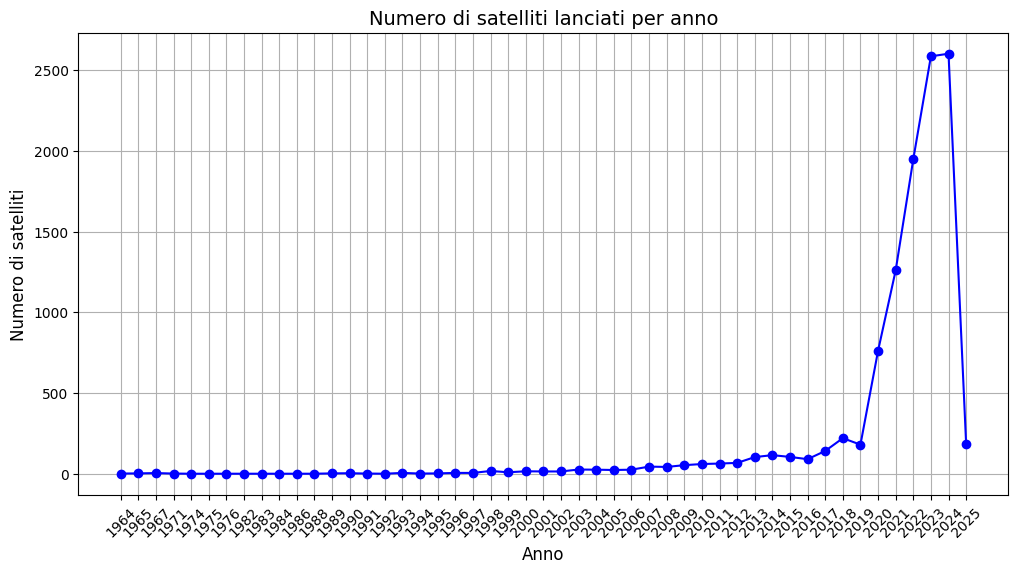

In [149]:
# raggruppo per anno e conta il numero di satelliti
satellites_per_year = satellites_df.groupby('Year').size()

# creo il grafico della crescita dei satelliti per anno
plt.figure(figsize=(12, 6))
plt.plot(satellites_per_year.index, satellites_per_year.values, marker='o', linestyle='-', color='b')

plt.title('Numero di satelliti lanciati per anno', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di satelliti', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Ruota le etichette dell'asse X

# grafico
plt.show()

Si può notare un incremento di satelliti a partire dal 2019.

Analizzo la classificazione dei satelliti come "classificati" o "non classificati"

In [150]:
# confronto dati per classificazione
# conto i satelliti per classificazione
classification_counts = satellites_df['CLASSIFICATION_TYPE'].value_counts()

# risultati
print(classification_counts)


CLASSIFICATION_TYPE
U    10867
Name: count, dtype: int64


In [151]:
# filtro i satelliti classificati
classified_satellites = satellites_df[satellites_df['CLASSIFICATION_TYPE'] == 'C']

# filtro i satelliti non classificati
unclassified_satellites = satellites_df[satellites_df['CLASSIFICATION_TYPE'] == 'U']

# mostro il numero di satelliti classificati e non classificati
print(f"Classificati: {classified_satellites.shape[0]}")
print(f"Non classificati: {unclassified_satellites.shape[0]}")


Classificati: 0
Non classificati: 10867


In [152]:
# verifico i valori unici in CLASSIFICATION_TYPE
print(satellites_df['CLASSIFICATION_TYPE'].unique())


['U']


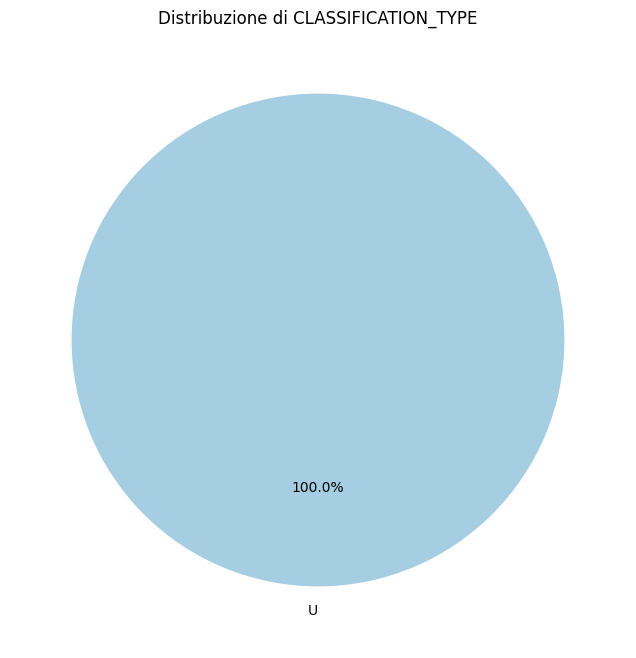

In [153]:
classification_counts = satellites_df['CLASSIFICATION_TYPE'].value_counts()

# creo il grafico a torta
plt.figure(figsize=(8, 8))
classification_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuzione di CLASSIFICATION_TYPE')
plt.ylabel('')  # rimozione 'etichetta asse y per renderlo più pulito
plt.show()


Dopo aver analizzato la colonna CLASSIFICATION_TYPE, è emerso che tutti i satelliti del dataset appartengono alla categoria "Unclassified" (non classificati). Questo significa che i dati inclusi nel dataset sono esclusivamente pubblici e non comprendono informazioni su satelliti militari o segreti, i quali rientrerebbero in altre categorie di classificazione come "Classified".

L'analisi si concentra quindi su satelliti che svolgono principalmente ruoli commerciali, scientifici, di comunicazione, o altre funzioni pubbliche, dunque il dataset è adatto a uno studio su larga scala della crescita e delle tendenze nell'industria spaziale civile e commerciale.


Passo ora all'analisi dei satelliti in base al tipo di orbita. Questo passaggio è fondamentale per comprendere la distribuzione dei satelliti nelle diverse fasce orbitali (LEO, MEO, GEO e altro) e per identificare eventuali tendenze o concentrazioni in specifiche orbite. Attraverso questa analisi, sarà possibile ottenere informazioni chiave sulla funzione e l'utilizzo dei satelliti nelle varie orbite.

In [154]:
# Classificazione dei satelliti per tipo di orbita
def classify_orbit(mean_motion):
    if mean_motion > 11.25:
        return 'LEO'
    elif 1.5 < mean_motion <= 11.25:
        return 'MEO'
    elif 0.95 <= mean_motion <= 1.05:
        return 'GEO'
    else:
        return 'Altro'

# applico la funzione al dataset
satellites_df['Orbit_Type'] = satellites_df['MEAN_MOTION'].apply(classify_orbit)

# risultati
print(satellites_df[['MEAN_MOTION', 'Orbit_Type']].head())


   MEAN_MOTION Orbit_Type
0    13.757874        LEO
1    13.528457        LEO
2     9.893078        MEO
3    13.335529        LEO
4    13.361622        LEO


In [155]:
# conto i satelliti per tipo di orbita
orbit_counts = satellites_df['Orbit_Type'].value_counts()

# risultati
print(orbit_counts)


Orbit_Type
LEO      10065
GEO        582
MEO        193
Altro       27
Name: count, dtype: int64


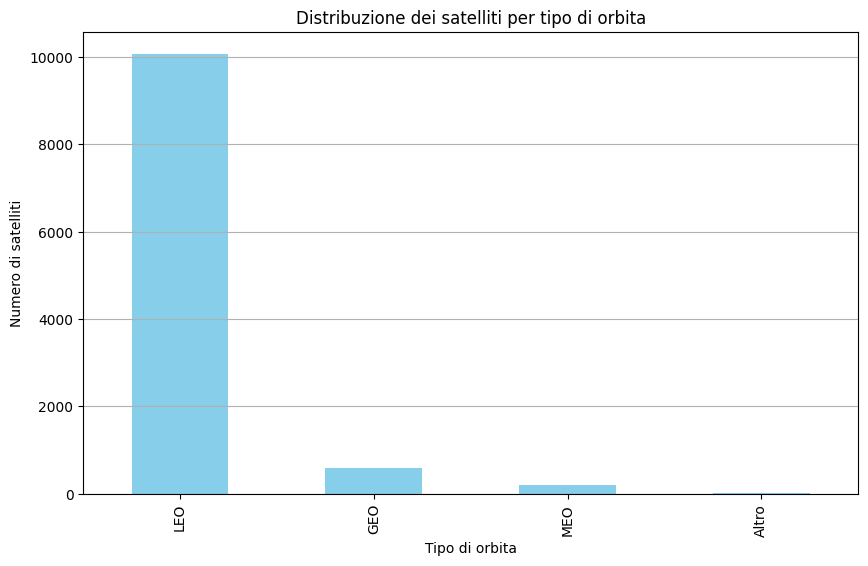

In [156]:
# grafico a barre
orbit_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribuzione dei satelliti per tipo di orbita')
plt.xlabel('Tipo di orbita')
plt.ylabel('Numero di satelliti')
plt.grid(axis='y')
plt.show()


Dal grafico emerge che la maggior parte dei satelliti orbitali appartiene alla categoria LEO (Low Earth Orbit), mentre un numero significativamente inferiore è presente nelle categorie GEO (Geostationary Earth Orbit), MEO (Medium Earth Orbit) e "Altro" (orbite non classificate o non standard).

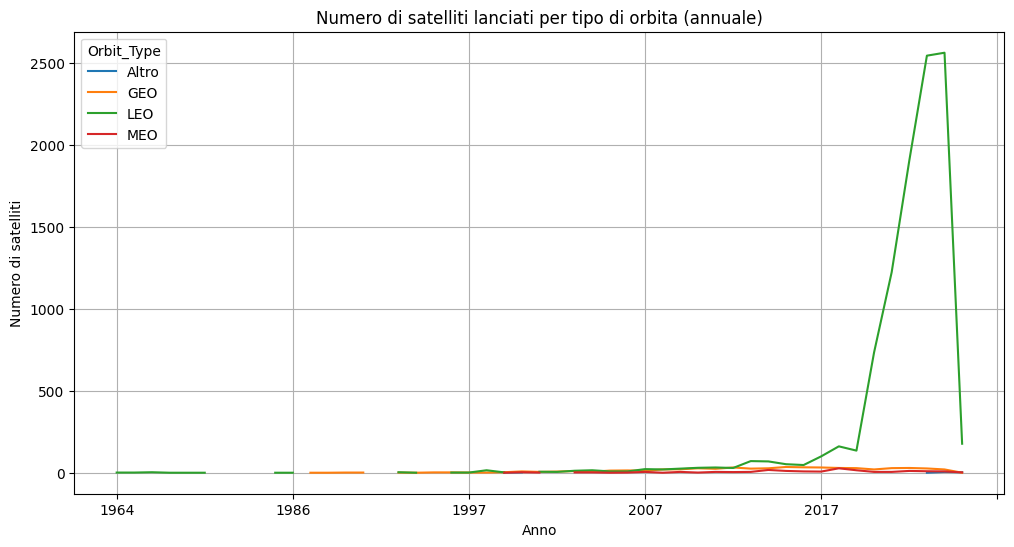

In [157]:
orbit_per_year = satellites_df.groupby(['Year', 'Orbit_Type']).size().unstack()

# Grafico dei lanci per tipo di orbita negli anni
orbit_per_year.plot(kind='line', figsize=(12, 6))
plt.title('Numero di satelliti lanciati per tipo di orbita (annuale)')
plt.xlabel('Anno')
plt.ylabel('Numero di satelliti')
plt.grid(True)
plt.show()


Dal grafico risulta evidente che negli ultimi anni il numero di satelliti lanciati nella fascia LEO (Low Earth Orbit) ha subito un rapido aumento, raggiungendo un picco significativo. Le altre orbite, come GEO (Geostationary Earth Orbit) e MEO (Medium Earth Orbit), mostrano una crescita molto più lenta e costante, mentre la categoria "Altro" rimane marginale.

## Conclusioni

L'obiettivo di questo progetto era analizzare i satelliti orbitali per identificare le principali tendenze e comprendere la distribuzione dei satelliti per tipologia di orbita, anno di lancio e classificazione. Per raggiungere questo scopo, è stato utilizzato un dataset pubblico contenente informazioni esclusivamente su satelliti non classificati.

Dall'analisi dei dati, è emerso che il numero di satelliti lanciati annualmente ha subito una crescita esponenziale negli ultimi anni, con un picco significativo dopo il 2019. Questo aumento è fortemente legato allo sviluppo di costellazioni satellitari commerciali, come Starlink di SpaceX e Kuiper di Amazon, progettate per fornire connessioni internet globali e migliorare l'accesso digitale in aree remote. La distribuzione delle orbite mostra una netta predominanza di satelliti in orbita LEO (Low Earth Orbit), che rappresentano oltre il 90% del totale. Questa preferenza riflette le caratteristiche vantaggiose delle orbite LEO, tra cui costi di lancio più bassi, tempi di comunicazione più rapidi e applicazioni versatili, come l'osservazione terrestre e la connettività globale.

Le orbite GEO (Geostationary Earth Orbit) e MEO (Medium Earth Orbit), invece, hanno una presenza significativamente inferiore. Queste orbite sono generalmente utilizzate per applicazioni specifiche, come la trasmissione televisiva o i sistemi di navigazione globale, e richiedono costi operativi maggiori. La categoria "Altro", benché marginale, include satelliti con orbite particolari, ma la mancanza di dettagli aggiuntivi nel dataset non ha permesso di approfondire ulteriormente la loro analisi.

Dal punto di vista della classificazione, è stato confermato che il dataset contiene esclusivamente satelliti non classificati, indicati con il tipo "Unclassified". Questo implica che l'analisi si basa su dati accessibili al pubblico e non include informazioni relative a satelliti governativi o militari, che rappresentano una parte significativa ma riservata del panorama spaziale globale. Questo aspetto, se da un lato garantisce trasparenza e utilizzo dei dati per scopi commerciali o accademici, dall'altro limita la possibilità di analisi più dettagliate su aspetti strategici e di sicurezza.

Un elemento importante del progetto è stato il processo di preparazione dei dati. Durante l'analisi preliminare, è stato verificato che il dataset non contenesse valori nulli o duplicati significativi. Questo ha permesso di lavorare su dati completi e affidabili senza necessità di interventi correttivi. Inoltre, sono state create nuove colonne per facilitare l'analisi, come l'estrazione dell'anno di lancio dalla colonna OBJECT_ID, che si è rivelata fondamentale per analizzare l'andamento temporale del numero di satelliti lanciati.

Nonostante il valore informativo del dataset, alcune limitazioni sono emerse durante il progetto. La presenza esclusiva di satelliti non classificati limita la possibilità di analisi globali complete, che richiederebbero l'inclusione di satelliti militari o governativi. Inoltre, alcune categorie di orbite, come "Altro", non hanno potuto essere analizzate in dettaglio a causa della scarsità di informazioni.

Guardando al futuro, l'esplosione del numero di satelliti in orbita, trainata dall'industria privata, presenta importanti implicazioni commerciali e sociali. Il mercato spaziale sta rapidamente evolvendo, con investimenti significativi in tecnologie satellitari e piattaforme di lancio. Tuttavia, questo rapido aumento solleva anche preoccupazioni sulla gestione del traffico spaziale, il rischio di collisioni e l'impatto ambientale dei detriti spaziali. In un contesto di crescente competizione globale, la cooperazione internazionale e lo sviluppo di politiche sostenibili saranno fondamentali per garantire un utilizzo responsabile dello spazio.
